In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
def fillage(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38.23
        elif Pclass == 2:
            return 29.87
        elif Pclass == 3:
            return 25.14
    else:
        return Age

In [6]:
df['Age'] = df[['Age','Pclass']].apply(fillage,axis=1)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Cabin grade'] = df[df['Cabin'].notnull()]['Cabin'].apply(lambda x: x[0])

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cabin grade    687
dtype: int64

In [10]:
df.drop(['Cabin grade','Cabin'],axis=1,inplace=True)

In [11]:
df1 = df.dropna(axis=0)

In [12]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [14]:
df1['Sex'] = pd.get_dummies(df['Sex'],drop_first=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df1['Ticket'] = df1['Ticket'].apply(lambda x: x.split()[0])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df1.drop('Ticket',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null uint8
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2), uint8(1)
memory usage: 70.3+ KB


In [18]:
xx = pd.get_dummies(df['Embarked'],drop_first=True)

In [19]:
df1 = pd.concat([df1,xx],axis=1)

In [20]:
df1.drop('Embarked',axis=1, inplace=True)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null float64
Survived       889 non-null float64
Pclass         889 non-null float64
Name           889 non-null object
Sex            889 non-null float64
Age            889 non-null float64
SibSp          889 non-null float64
Parch          889 non-null float64
Fare           889 non-null float64
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(8), object(1), uint8(2)
memory usage: 71.3+ KB


In [22]:
df1['Name'] = df1['Name'].str.len()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


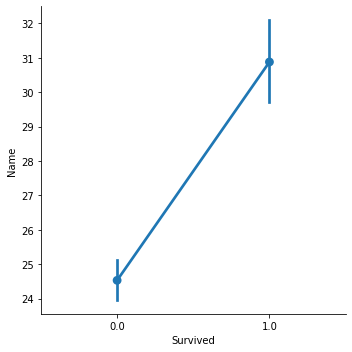

In [23]:
sns.factorplot(x='Survived', y='Name', data=df1)

In [24]:
df1.groupby('Survived')['Name'].mean()

Survived
0.0    24.531876
1.0    30.876471
Name: Name, dtype: float64

In [25]:
df2 = df1.drop('Name',axis=1)

In [26]:
RFC = RandomForestClassifier(n_estimators=10,random_state= 100)

In [34]:
X = df2.drop('Survived',axis=1)

In [35]:
y = df2['Survived']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [37]:
df2['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 25.14, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 29.87, 31.  , 34.  , 15.  ,
       28.  ,  8.  , 19.  , 40.  , 38.23, 66.  , 42.  , 21.  , 18.  ,
        3.  ,  7.  , 49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  ,
       17.  , 32.  , 16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  ,
       46.  , 59.  , 71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,
        9.  , 36.5 , 51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  ,
       50.  , 36.  , 45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,
        0.92, 43.  , 60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  ,
       57.  , 80.  , 70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 ,
       74.  ])

In [38]:
def fillage(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38.23
        elif Pclass == 2:
            return 29.87
        elif Pclass == 3:
            return 25.14
    else:
        return Age

In [39]:
df2['Age'] = df2[['Age','Pclass']].apply(fillage,axis=1)

In [40]:
df2.dropna(axis=0,inplace=True)

In [41]:
y_test

511    0.0
613    0.0
615    1.0
337    1.0
718    0.0
      ... 
124    0.0
526    1.0
783    0.0
195    1.0
847    0.0
Name: Survived, Length: 89, dtype: float64

In [42]:
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [43]:
pred = RFC.predict(X_test)

In [44]:
y_test

511    0.0
613    0.0
615    1.0
337    1.0
718    0.0
      ... 
124    0.0
526    1.0
783    0.0
195    1.0
847    0.0
Name: Survived, Length: 89, dtype: float64

In [45]:
pp = pd.DataFrame(y_test)

In [46]:
pp['Prediction'] = pred

In [47]:
pp

,Survived,Prediction
511,0.0,0.0
613,0.0,0.0
615,1.0,1.0
337,1.0,1.0
718,0.0,0.0
...,...,...
124,0.0,0.0
526,1.0,1.0
783,0.0,0.0
195,1.0,1.0


In [48]:
test = pd.read_csv('test.csv')

In [49]:
# df1['Sex'] = pd.get_dummies(df['Sex'],drop_first=True)
# df1['Ticket'] = df1['Ticket'].apply(lambda x: x.split()[0])

In [50]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [51]:
def fillage(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38.23
        elif Pclass == 2:
            return 29.87
        elif Pclass == 3:
            return 25.14
    else:
        return Age
    
test['Age'] = test[['Age','Pclass']].apply(fillage,axis=1)
test['Sex'] = pd.get_dummies(test['Sex'],drop_first=True)
test.drop(['Ticket','Name','Cabin'],axis=1,inplace=True)

In [52]:
dd = pd.get_dummies(test['Embarked'], drop_first=True)

In [53]:
test = pd.concat([test,dd],axis=1)

In [54]:
test.drop('Embarked',axis=1,inplace=True)

In [55]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
835,836.0,1.0,0.0,39.0,1.0,1.0,83.1583,0,0
534,535.0,3.0,0.0,30.0,0.0,0.0,8.6625,0,1
8,9.0,3.0,0.0,27.0,0.0,2.0,11.1333,0,1
382,383.0,3.0,1.0,32.0,0.0,0.0,7.9250,0,1
203,204.0,3.0,1.0,45.5,0.0,0.0,7.2250,0,0


In [56]:
test.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,107.0,94.280297,84.435858,0.0000,30.10,60.0000,134.5,512.3292
2,93.0,22.202104,13.991877,9.6875,13.00,15.7500,26.0,73.5000
3,217.0,12.459678,10.803698,3.1708,7.75,7.8958,14.4,69.5500


In [57]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
152,1044,3,1,60.5,0,0,NaN,0,1


In [58]:
test[test['PassengerId']==1044]['Fare']=12.45

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
test['Fare'].fillna(value=12.45,inplace=True)

In [60]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Q              0
S              0
dtype: int64

In [61]:
prediction4 = RFC.predict(test)

In [62]:
prediction4

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [63]:
test_prediction = pd.DataFrame(test['PassengerId'])

In [64]:
test_prediction['Survived'] = prediction4

In [315]:
test_prediction.to_csv('Prediction4.csv')

In [316]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,892,3,1,34.50,0,0,7.8292,1,0
1,893,3,0,47.00,1,0,7.0000,0,1
2,894,2,1,62.00,0,0,9.6875,1,0
3,895,3,1,27.00,0,0,8.6625,0,1
4,896,3,0,22.00,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,25.14,0,0,8.0500,0,1
414,1306,1,0,39.00,0,0,108.9000,0,0
415,1307,3,1,38.50,0,0,7.2500,0,1
416,1308,3,1,25.14,0,0,8.0500,0,1


In [67]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87        57
         1.0       0.81      0.69      0.75        32

    accuracy                           0.83        89
   macro avg       0.83      0.80      0.81        89
weighted avg       0.83      0.83      0.83        89



In [68]:
confusion_matrix(y_test,pred)

array([[52,  5],
       [10, 22]], dtype=int64)